Model and data loaded.
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Accuracy: 0.9870387826555346

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15411
           1       0.99      0.99      0.99     14293

    accuracy                           0.99     29704
   macro avg       0.99      0.99      0.99     29704
weighted avg       0.99      0.99      0.99     29704



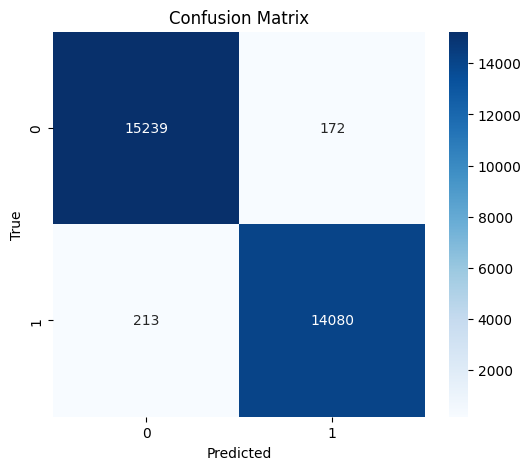

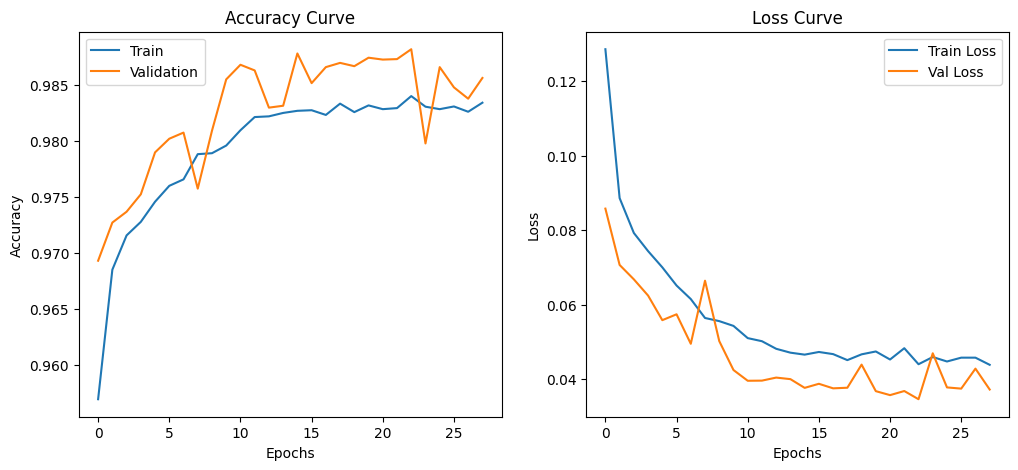

Visualization complete.


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model


X = np.load("../data/X.npy")
y = np.load("../data/y.npy")

model = load_model("../models/nslkdd_dnn_model.keras")

print("Model and data loaded.")

# 2) Train/test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# 4) Confusion Matrix + Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 5) Load training history
history = np.load("../models/training_history.npy", allow_pickle=True).item()

# 6) Accuracy & Loss curves
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Validation')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

print("Visualization complete.")
